In [232]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [233]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [234]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [235]:
data.shape

(8693, 14)

In [236]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [237]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [238]:
data['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [239]:
data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [240]:
data.duplicated('PassengerId').sum()

0

In [241]:
test.shape

(4277, 13)

In [242]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [243]:
test.duplicated('PassengerId').sum()

0

<Axes: xlabel='Transported', ylabel='count'>

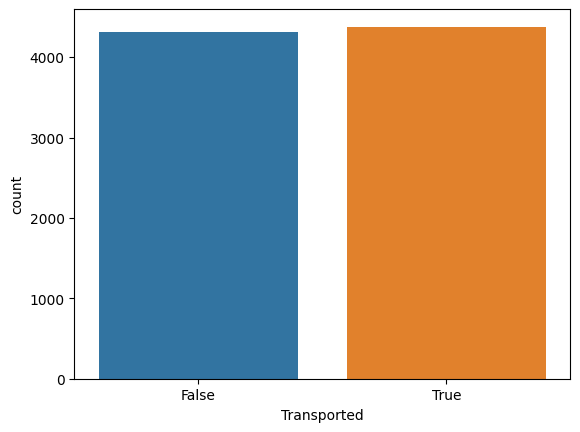

In [244]:
sb.countplot(x='Transported',data=data)

In [245]:
data['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

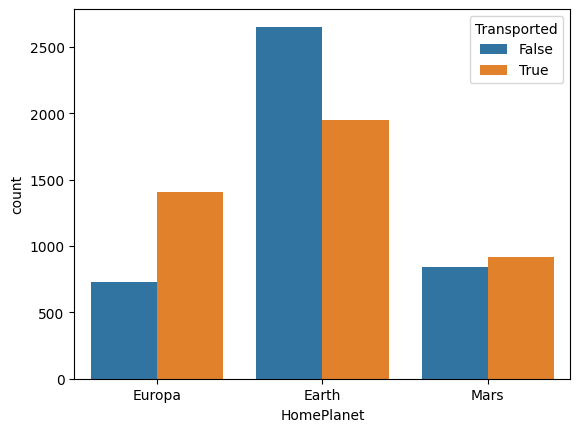

In [246]:
sb.countplot(x='HomePlanet',data=data,hue='Transported')

In [247]:
cost_col=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [248]:
data.loc[data['CryoSleep']==True,cost_col]=data.loc[data['CryoSleep']==True,cost_col].fillna(0)

In [249]:
data['total_cost']=data[cost_col].sum(axis=1)

In [250]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
total_cost        0
dtype: int64

<Axes: xlabel='total_cost', ylabel='CryoSleep'>

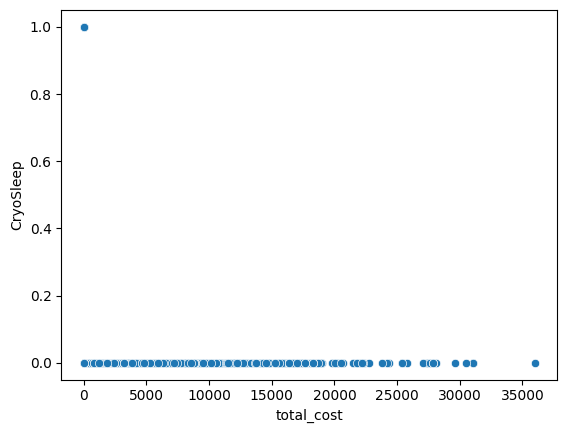

In [251]:
sb.scatterplot(x='total_cost',data=data,y='CryoSleep')

In [252]:
data[(data['CryoSleep']==False) & (data['total_cost']==0)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,0.0
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True,0.0
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False,0.0
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,9157_06,Earth,False,G/1476/S,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Pamont Navages,False,0.0
8637,9219_01,Earth,False,G/1487/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Daley Workmanson,False,0.0
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True,0.0
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False,0.0


<Axes: xlabel='CryoSleep', ylabel='count'>

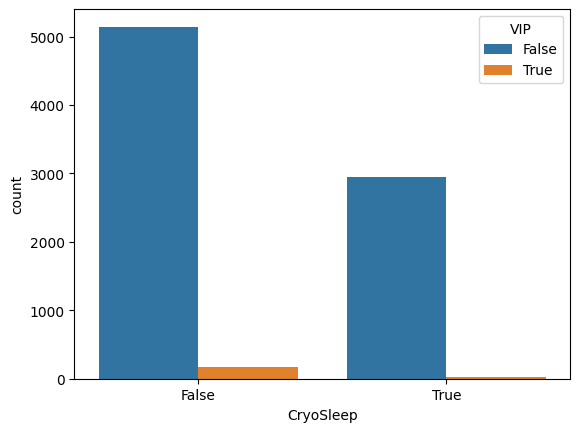

In [253]:
sb.countplot(x='CryoSleep',data=data,hue='VIP')

In [254]:
data[(data['VIP']==True) & (data['CryoSleep']==True)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost
365,0402_01,NaN,True,D/15/S,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,Teron Sageng,True,0.0
589,0612_01,Europa,True,B/25/P,TRAPPIST-1e,27.0,True,0.0,0.0,0.0,0.0,0.0,Achyon Ranaly,True,0.0
1849,1976_03,Europa,True,B/82/S,55 Cancri e,26.0,True,0.0,0.0,0.0,0.0,0.0,Cellah Lansuffle,True,0.0
2394,2572_02,Europa,True,C/93/S,55 Cancri e,56.0,True,0.0,0.0,0.0,0.0,0.0,Spuri Suptibler,True,0.0
2675,2866_01,Europa,True,C/110/S,TRAPPIST-1e,36.0,True,0.0,0.0,0.0,0.0,0.0,Hadirk Wheededly,True,0.0
3104,3349_01,Europa,True,C/111/P,TRAPPIST-1e,73.0,True,0.0,0.0,0.0,0.0,0.0,Sargin Brakeril,True,0.0
4071,4348_01,Europa,True,B/142/P,TRAPPIST-1e,47.0,True,0.0,0.0,0.0,0.0,0.0,Krazet Conate,True,0.0
4155,4441_01,Europa,True,B/144/P,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,Kabiton Clinarfork,True,0.0
4401,4668_02,Europa,True,C/180/S,55 Cancri e,27.0,True,0.0,0.0,0.0,0.0,0.0,Sadrus Scerodbox,True,0.0
4503,4786_01,Europa,True,B/160/P,TRAPPIST-1e,46.0,True,0.0,0.0,0.0,0.0,0.0,Enibah Dratembid,True,0.0


In [255]:
data[data['total_cost']!=0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True,3540.0
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [256]:
data[['deck','deck_no','side']]=data['Cabin'].str.split('/',expand=True)

In [257]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


In [258]:
data['deck_no'].value_counts()

deck_no
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64

In [259]:
data['side'].value_counts()

side
S    4288
P    4206
Name: count, dtype: int64

In [260]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
total_cost        0
deck            199
deck_no         199
side            199
dtype: int64

In [261]:
data['family']=data['PassengerId'].astype(str).str[:4]

In [262]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side,family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S,9280


In [263]:
data['family'].value_counts().head(20)

family
4498    8
8168    8
8728    8
8796    8
8956    8
4256    8
0984    8
9081    8
8988    8
5756    8
5885    8
4005    8
5133    8
4176    7
1211    7
0714    7
6363    7
6787    7
8770    7
4172    7
Name: count, dtype: int64

In [264]:
data[data['family']=='4176']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side,family
3899,4176_01,Mars,True,F/859/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Rants Fla,True,0.0,F,859,P,4176
3900,4176_02,Mars,True,F/859/P,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Lidex Opité,True,0.0,F,859,P,4176
3901,4176_03,Mars,False,F/859/P,TRAPPIST-1e,20.0,False,760.0,0.0,742.0,352.0,0.0,Shood Opité,True,1854.0,F,859,P,4176
3902,4176_04,Mars,False,F/859/P,TRAPPIST-1e,38.0,False,490.0,663.0,358.0,855.0,0.0,Othawk Fla,False,2366.0,F,859,P,4176
3903,4176_05,Mars,False,D/142/P,TRAPPIST-1e,46.0,False,247.0,0.0,418.0,480.0,36.0,Risps Fla,False,1181.0,D,142,P,4176
3904,4176_06,Mars,True,F/859/P,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Wafros Fla,True,0.0,F,859,P,4176
3905,4176_07,Mars,False,F/859/P,55 Cancri e,24.0,False,612.0,326.0,46.0,87.0,0.0,Wille Fla,True,1071.0,F,859,P,4176


In [265]:
data['family'].value_counts().sort_values(ascending=False).iloc[200:220]

family
7156    4
8989    4
7984    4
1353    4
7830    4
6468    4
1767    4
7950    4
3747    4
2404    4
4336    4
8098    4
2308    4
7395    4
0772    4
6328    4
4774    4
4680    4
3279    4
6748    4
Name: count, dtype: int64

In [266]:
data[data['family']=='0772']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side,family
735,0772_01,Europa,False,E/56/S,55 Cancri e,37.0,False,0.0,16.0,325.0,4476.0,1359.0,Minoton Hednigic,False,6176.0,E,56,S,0772
736,0772_02,Europa,True,E/56/S,55 Cancri e,15.0,False,0.0,0.0,0.0,0.0,0.0,Halleth Plegred,True,0.0,E,56,S,0772
737,0772_03,NaN,True,E/56/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Weia Hednigic,True,0.0,E,56,S,0772
738,0772_04,Europa,False,E/56/S,55 Cancri e,7.0,False,0.0,0.0,0.0,0.0,0.0,Arrain Hednigic,True,0.0,E,56,S,0772


In [267]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
total_cost        0
deck            199
deck_no         199
side            199
family            0
dtype: int64

In [268]:
data[data['family']=='0772']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side,family
735,0772_01,Europa,False,E/56/S,55 Cancri e,37.0,False,0.0,16.0,325.0,4476.0,1359.0,Minoton Hednigic,False,6176.0,E,56,S,0772
736,0772_02,Europa,True,E/56/S,55 Cancri e,15.0,False,0.0,0.0,0.0,0.0,0.0,Halleth Plegred,True,0.0,E,56,S,0772
737,0772_03,NaN,True,E/56/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Weia Hednigic,True,0.0,E,56,S,0772
738,0772_04,Europa,False,E/56/S,55 Cancri e,7.0,False,0.0,0.0,0.0,0.0,0.0,Arrain Hednigic,True,0.0,E,56,S,0772


In [269]:
data[data['family'].isin(data['family'].value_counts().iloc[:-100].index)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side,family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S,9280


In [270]:
data['HomePlanet'].fillna(method='ffill',inplace=True)

In [271]:
data[data['family'].isin(data['family'].value_counts().iloc[:-100].index)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_cost,deck,deck_no,side,family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98,P,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499,S,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500,S,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608,S,9280


In [272]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
total_cost        0
deck            199
deck_no         199
side            199
family            0
dtype: int64

In [273]:
data=data.drop(['Cabin','Age','Name','deck_no'],axis=1)

In [274]:
data[(data['CryoSleep']==True) & (data['VIP']==True)].shape

(21, 15)

In [275]:
data[(data['CryoSleep']==True) & (data['VIP']==False)].shape

(2941, 15)

In [276]:
data.loc[(data['VIP']==False)& (data['CryoSleep'].isnull()),'CryoSleep']=True

In [277]:
data[(data['CryoSleep']==False) & (data['VIP']==True)].shape

(175, 15)

In [278]:
data[(data['CryoSleep']==False) & (data['VIP']==False)].shape

(5143, 15)

In [279]:
#data.loc[(data['CryoSleep']==False) & (data['VIP'].isnull()),'VIP']=False

In [280]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep        10
Destination     182
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
total_cost        0
deck            199
side            199
family            0
dtype: int64

In [281]:
data['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [282]:
data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3244
Name: count, dtype: int64

In [283]:
data[(data['HomePlanet']=='Earth') & (data['CryoSleep']==False)]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,736.0,F,S,0002
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,F,S,0004
5,0005_01,Earth,False,PSO J318.5-22,False,0.0,483.0,0.0,291.0,0.0,True,774.0,F,P,0005
6,0006_01,Earth,False,TRAPPIST-1e,False,42.0,1539.0,3.0,0.0,0.0,True,1584.0,F,S,0006
8,0007_01,Earth,False,TRAPPIST-1e,False,0.0,785.0,17.0,216.0,0.0,True,1018.0,F,S,0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,9248_01,Earth,False,55 Cancri e,NaN,28.0,1208.0,973.0,207.0,0.0,True,2416.0,F,S,9248
8674,9257_01,Earth,False,TRAPPIST-1e,False,39.0,0.0,1085.0,24.0,0.0,False,1148.0,F,P,9257
8682,9272_01,Earth,False,TRAPPIST-1e,False,240.0,242.0,510.0,0.0,0.0,True,992.0,G,P,9272
8683,9272_02,Earth,False,TRAPPIST-1e,False,86.0,3.0,149.0,208.0,329.0,False,775.0,F,P,9272


In [284]:
data['HomePlanet'].value_counts()

HomePlanet
Earth     4720
Europa    2177
Mars      1796
Name: count, dtype: int64

In [285]:
data['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [286]:
data[data['Destination']=='PSO J318.5-22']

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family
5,0005_01,Earth,False,PSO J318.5-22,False,0.0,483.0,0.0,291.0,0.0,True,774.0,F,P,0005
25,0020_05,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,0.0,E,S,0020
45,0044_03,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,True,0.0,G,P,0044
55,0058_01,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,0.0,G,S,0058
61,0067_01,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,True,0.0,G,S,0067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,9244_01,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,True,0.0,G,S,9244
8671,9253_01,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,True,0.0,G,S,9253
8672,9254_01,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,0.0,G,P,9254
8676,9261_01,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,0.0,G,P,9261


In [287]:
data['family_size']=data.groupby('family')['family'].transform('size')

In [288]:
data['family_size'].value_counts()

family_size
1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: count, dtype: int64

In [289]:
data[(data['family_size']>=7) & (data['VIP']==True)].shape

(1, 16)

In [290]:
data.loc[(data['family_size']>=7) & (data['VIP'].isnull()),'VIP']=False

In [291]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep        10
Destination     182
VIP             198
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
total_cost        0
deck            199
side            199
family            0
family_size       0
dtype: int64

In [292]:
data[(data['Destination']=='PSO J318.5-22') & (data['HomePlanet']=='Earth') & (data['VIP']==False)].shape

(705, 16)

In [293]:
data.loc[(data['Destination'].isnull()) & (data['HomePlanet']=='Earth') & (data['VIP']==False),'Destination']='PSO J318.5-22'

In [294]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep        10
Destination      85
VIP             198
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
total_cost        0
deck            199
side            199
family            0
family_size       0
dtype: int64

In [295]:
data[(data['Destination']=='55 Cancri e') & (data['HomePlanet']=='Mars') & (data['VIP']==False) ]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size
16,0014_01,Mars,False,55 Cancri e,False,1286.0,122.0,NaN,0.0,0.0,False,1408.0,F,P,0014,1
37,0035_01,Mars,False,55 Cancri e,False,784.0,964.0,0.0,951.0,0.0,False,2699.0,D,P,0035,1
203,0221_01,Mars,False,55 Cancri e,False,2237.0,0.0,119.0,0.0,0.0,False,2356.0,E,S,0221,7
239,0257_01,Mars,False,55 Cancri e,False,1664.0,0.0,NaN,0.0,0.0,False,1664.0,F,S,0257,2
300,0333_01,Mars,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,F,P,0333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,9010_01,Mars,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,F,P,9010,1
8449,9024_01,Mars,False,55 Cancri e,False,63.0,0.0,1970.0,0.0,0.0,True,2033.0,F,S,9024,1
8464,9037_01,Mars,False,55 Cancri e,False,1410.0,3.0,49.0,0.0,0.0,False,1462.0,F,S,9037,1
8627,9203_01,Mars,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,F,S,9203,1


In [296]:
data.loc[(data['Destination'].isnull()) & (data['HomePlanet']=='Mars') & (data['VIP']==False),'Destination']='55 Cancri e'

In [297]:
data[(data['Destination'].isnull()) & (data['HomePlanet']=='Earth') & (data['VIP']==False)]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size


In [298]:
data[data['Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size
347,0382_01,Europa,False,NaN,False,348.0,0.0,0.0,4.0,368.0,False,720.0,G,P,0382,1
468,0504_03,Europa,True,NaN,False,0.0,0.0,0.0,0.0,0.0,True,0.0,B,S,0504,6
529,0564_03,Europa,False,NaN,False,0.0,410.0,2.0,1354.0,3695.0,False,5461.0,B,P,0564,3
540,0571_04,Europa,True,NaN,False,0.0,0.0,0.0,0.0,0.0,True,0.0,C,P,0571,7
711,0753_01,Europa,True,NaN,False,0.0,0.0,0.0,0.0,0.0,True,0.0,A,P,0753,3
719,0761_01,Europa,False,NaN,False,0.0,3879.0,0.0,48.0,67.0,True,3994.0,C,P,0761,1
906,0979_01,Europa,False,NaN,False,0.0,0.0,0.0,0.0,0.0,True,0.0,B,S,0979,1
1076,1148_05,Europa,True,NaN,False,0.0,0.0,0.0,0.0,0.0,True,0.0,C,P,1148,7
1558,1653_01,Europa,False,NaN,False,4.0,1303.0,830.0,774.0,2.0,False,2913.0,A,S,1653,1
2070,2215_04,Europa,False,NaN,False,0.0,3206.0,0.0,698.0,72.0,False,3976.0,A,S,2215,4


In [299]:
data[(data['Destination']=='55 Cancri e') & (data['HomePlanet']=='Europa') & (data['VIP']==False)]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size
9,0008_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,B,P,0008,3
11,0008_03,Europa,False,55 Cancri e,False,39.0,7295.0,589.0,110.0,124.0,True,8157.0,B,P,0008,3
30,0026_01,Europa,False,55 Cancri e,False,22.0,6073.0,0.0,1438.0,328.0,False,7861.0,C,P,0026,1
36,0034_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,D,S,0034,1
129,0139_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,C,S,0139,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,9218_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,B,S,9218,1
8669,9252_01,Europa,False,55 Cancri e,False,0.0,8160.0,205.0,0.0,438.0,True,8803.0,B,P,9252,2
8670,9252_02,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,B,P,9252,2
8677,9264_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,True,0.0,E,S,9264,1


In [300]:
data[(data['VIP']==True)& (data['family_size']==1)]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size
108,0112_01,Europa,False,55 Cancri e,True,0.0,2537.0,87.0,17.0,13.0,True,2654.0,B,S,0112,1
214,0224_01,Mars,False,TRAPPIST-1e,True,181.0,0.0,5.0,1634.0,0.0,False,1820.0,F,S,0224,1
291,0321_01,Earth,False,TRAPPIST-1e,True,1018.0,0.0,209.0,0.0,0.0,False,1227.0,F,S,0321,1
356,0391_01,Europa,False,PSO J318.5-22,True,69.0,5728.0,0.0,0.0,987.0,True,6784.0,C,P,0391,1
365,0402_01,Mars,True,55 Cancri e,True,0.0,0.0,0.0,0.0,0.0,True,0.0,D,S,0402,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,8858_01,Europa,False,TRAPPIST-1e,True,0.0,0.0,0.0,0.0,0.0,False,0.0,B,P,8858,1
8339,8905_01,Mars,False,TRAPPIST-1e,True,0.0,0.0,0.0,0.0,0.0,True,0.0,E,P,8905,1
8579,9158_01,Europa,True,55 Cancri e,True,0.0,0.0,0.0,0.0,0.0,True,0.0,B,P,9158,1
8652,9230_01,Europa,False,TRAPPIST-1e,True,0.0,5600.0,715.0,2868.0,971.0,True,10154.0,C,S,9230,1


In [301]:
data[data['VIP']==True]

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,S,0003,2
108,0112_01,Europa,False,55 Cancri e,True,0.0,2537.0,87.0,17.0,13.0,True,2654.0,B,S,0112,1
120,0128_01,Mars,False,TRAPPIST-1e,True,2353.0,334.0,9.0,316.0,2.0,False,3014.0,D,S,0128,2
214,0224_01,Mars,False,TRAPPIST-1e,True,181.0,0.0,5.0,1634.0,0.0,False,1820.0,F,S,0224,1
291,0321_01,Earth,False,TRAPPIST-1e,True,1018.0,0.0,209.0,0.0,0.0,False,1227.0,F,S,0321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,Europa,True,55 Cancri e,True,0.0,0.0,0.0,0.0,0.0,True,0.0,B,P,9158,1
8614,9194_02,Europa,False,TRAPPIST-1e,True,1003.0,909.0,0.0,0.0,15.0,False,1927.0,E,S,9194,2
8621,9197_02,Europa,False,NaN,True,0.0,7964.0,0.0,3238.0,5839.0,False,17041.0,C,P,9197,4
8652,9230_01,Europa,False,TRAPPIST-1e,True,0.0,5600.0,715.0,2868.0,971.0,True,10154.0,C,S,9230,1


In [302]:
data[(data['VIP']==True)& (data['CryoSleep']==False)& (data['total_cost']!=0)].head(60)

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_cost,deck,side,family,family_size
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,S,0003,2
108,0112_01,Europa,False,55 Cancri e,True,0.0,2537.0,87.0,17.0,13.0,True,2654.0,B,S,0112,1
120,0128_01,Mars,False,TRAPPIST-1e,True,2353.0,334.0,9.0,316.0,2.0,False,3014.0,D,S,0128,2
214,0224_01,Mars,False,TRAPPIST-1e,True,181.0,0.0,5.0,1634.0,0.0,False,1820.0,F,S,0224,1
291,0321_01,Earth,False,TRAPPIST-1e,True,1018.0,0.0,209.0,0.0,0.0,False,1227.0,F,S,0321,1
356,0391_01,Europa,False,PSO J318.5-22,True,69.0,5728.0,0.0,0.0,987.0,True,6784.0,C,P,0391,1
358,0395_01,Europa,False,55 Cancri e,True,0.0,11003.0,552.0,8157.0,5688.0,False,25400.0,B,P,0395,2
363,0401_01,Mars,False,TRAPPIST-1e,True,1056.0,0.0,0.0,0.0,0.0,False,1056.0,D,S,0401,2
366,0403_01,Mars,False,TRAPPIST-1e,True,353.0,896.0,0.0,0.0,2.0,True,1251.0,D,P,0403,1
404,0444_01,Mars,False,TRAPPIST-1e,True,2484.0,429.0,102.0,0.0,0.0,False,3015.0,D,P,0444,2


In [303]:
data[(data['VIP']==True)& (data['CryoSleep']==False)& (data['total_cost']!=0)].shape

(168, 16)

In [304]:
data.loc[(data['VIP'].isnull())& (data['CryoSleep']==False)& (data['total_cost']!=0),'VIP']=True

In [305]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep        10
Destination      43
VIP              93
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
total_cost        0
deck            199
side            199
family            0
family_size       0
dtype: int64

In [306]:
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])

In [307]:
data['deck']=data['deck'].fillna(method='ffill')
data['side']=data['side'].fillna(method='ffill')

In [308]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [309]:
data['CryoSleep']=data['CryoSleep'].fillna(method='ffill')
data['Destination']=data['Destination'].fillna(method='ffill')

In [310]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Transported       0
total_cost        0
deck              0
side              0
family            0
family_size       0
dtype: int64

In [311]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the desired imputation strategy
imputer = SimpleImputer(strategy='mean')


In [312]:
missing_columns = data.columns[data.isnull().any()]

In [313]:
data[missing_columns] = imputer.fit_transform(data[missing_columns])

In [314]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
total_cost      0
deck            0
side            0
family          0
family_size     0
dtype: int64

In [315]:
data=data.drop(['PassengerId','total_cost','family'],axis=1)

In [316]:
data

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,family_size
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,F,S,1
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,2
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,2
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,1
8689,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,False,G,S,1
8690,Earth,False,TRAPPIST-1e,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1
8691,Europa,False,55 Cancri e,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,2


In [317]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [318]:
test.loc[test['CryoSleep']==True,cost_col]=test.loc[test['CryoSleep']==True,cost_col].fillna(0)

test['total_cost']=test[cost_col].sum(axis=1)

In [319]:
test[['deck','deck_no','side']]=test['Cabin'].str.split('/',expand=True)

In [320]:
test.shape

(4277, 17)

In [321]:
test['family']=test['PassengerId'].astype(str).str[:4]

In [322]:
test['family'].value_counts().head(20)

family
6332    8
6499    8
6986    8
8543    8
1072    8
0339    8
8980    7
0717    7
9238    7
1354    7
4582    7
7597    7
5329    7
7130    7
2794    7
3368    7
3659    7
3601    7
3589    7
3411    7
Name: count, dtype: int64

In [323]:
test['HomePlanet'].fillna(method='ffill',inplace=True)

In [324]:
test=test.drop(['Cabin','Age','Name','deck_no'],axis=1)

In [325]:
test.loc[(test['VIP']==False)& (test['CryoSleep'].isnull()),'CryoSleep']=True

In [326]:
test['family_size']=test.groupby('family')['family'].transform('size')

In [327]:
test.loc[(test['family_size']>=7) & (test['VIP'].isnull()),'VIP']=False

In [328]:
test.loc[(test['Destination'].isnull()) & (test['HomePlanet']=='Earth') & (test['VIP']==False),'Destination']='PSO J318.5-22'

In [329]:
test.loc[(test['Destination'].isnull()) & (test['HomePlanet']=='Mars') & (test['VIP']==False),'Destination']='55 Cancri e'

In [330]:
test.loc[(test['VIP'].isnull())& (test['CryoSleep']==False)& (test['total_cost']!=0),'VIP']=True

In [331]:
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])

test['deck']=test['deck'].fillna(method='ffill')
test['side']=test['side'].fillna(method='ffill')


test['CryoSleep']=test['CryoSleep'].fillna(method='ffill')
test['Destination']=test['Destination'].fillna(method='ffill')

In [332]:
missing_columns_test = test.columns[test.isnull().any()]

test[missing_columns_test] = imputer.fit_transform(test[missing_columns_test])

test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
total_cost      0
deck            0
side            0
family          0
family_size     0
dtype: int64

In [333]:
test_id=test.copy()

In [334]:
test=test.drop(['PassengerId','total_cost','family'],axis=1)

In [335]:
test

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,family_size
0,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,G,S,1
1,Earth,False,TRAPPIST-1e,False,0.0,9.0,0.0,2823.0,0.0,F,S,1
2,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,C,S,1
3,Europa,False,TRAPPIST-1e,False,0.0,6652.0,0.0,181.0,585.0,C,S,1
4,Earth,False,TRAPPIST-1e,False,10.0,0.0,635.0,0.0,0.0,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,G,S,2
4273,Earth,False,TRAPPIST-1e,False,0.0,847.0,17.0,10.0,144.0,G,S,1
4274,Mars,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,D,P,1
4275,Europa,False,55 Cancri e,False,0.0,2680.0,0.0,0.0,523.0,D,P,1


In [336]:
data['deck'].value_counts()

deck
F    2847
G    2626
E     897
B     803
C     764
D     485
A     266
T       5
Name: count, dtype: int64

In [337]:
print(f"data shape= {data.shape}, test shape={test.shape}")

data shape= (8693, 13), test shape=(4277, 12)


In [338]:
data=pd.get_dummies(columns=['HomePlanet','CryoSleep','Destination','VIP','deck','side','family_size'],drop_first=True,data=data).astype(int)

In [339]:
test=pd.get_dummies(columns=['HomePlanet','CryoSleep','Destination','VIP','deck','side','family_size'],drop_first=True,data=test).astype(int)

In [340]:
data

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,...,deck_G,deck_T,side_S,family_size_2,family_size_3,family_size_4,family_size_5,family_size_6,family_size_7,family_size_8
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,109,9,25,549,44,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,43,3576,0,6715,49,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,1283,371,3329,193,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,303,70,151,565,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,6819,0,1643,74,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
8690,0,0,1872,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
8691,0,1049,0,353,3235,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [341]:
x=data.drop('Transported',axis=1)
y=data['Transported']

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [343]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [344]:
rfc=RandomForestClassifier()

In [345]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [346]:
rfc.score(xtest,ytest)

0.7861085556577737

In [347]:
pred=rfc.predict(test)

In [349]:
submission=pd.DataFrame({'PassengerId':test_id['PassengerId'],'Transported':pred})

In [352]:
submission['Transported']=submission['Transported'].astype(bool)

In [354]:
submission.to_csv('submission.csv',index=False)